# 強者用PyTorch - 預測房價

In [36]:
import torch
import numpy as np

In [37]:
from torch.autograd import Variable

# 1. 準備數據

In [38]:
x = Variable(torch.linspace(0,100).type(torch.FloatTensor))
x

tensor([  0.0000,   1.0101,   2.0202,   3.0303,   4.0404,   5.0505,   6.0606,
          7.0707,   8.0808,   9.0909,  10.1010,  11.1111,  12.1212,  13.1313,
         14.1414,  15.1515,  16.1616,  17.1717,  18.1818,  19.1919,  20.2020,
         21.2121,  22.2222,  23.2323,  24.2424,  25.2525,  26.2626,  27.2727,
         28.2828,  29.2929,  30.3030,  31.3131,  32.3232,  33.3333,  34.3434,
         35.3535,  36.3636,  37.3737,  38.3838,  39.3939,  40.4040,  41.4141,
         42.4242,  43.4343,  44.4444,  45.4545,  46.4646,  47.4747,  48.4848,
         49.4949,  50.5051,  51.5152,  52.5253,  53.5354,  54.5455,  55.5556,
         56.5657,  57.5758,  58.5859,  59.5960,  60.6061,  61.6162,  62.6263,
         63.6364,  64.6465,  65.6566,  66.6667,  67.6768,  68.6869,  69.6970,
         70.7071,  71.7172,  72.7273,  73.7374,  74.7475,  75.7576,  76.7677,
         77.7778,  78.7879,  79.7980,  80.8081,  81.8182,  82.8283,  83.8384,
         84.8485,  85.8586,  86.8687,  87.8788,  88.8889,  89.89

In [39]:
rand = torch.randn(100) * 10 #随机生成100个满足标准正态分布的随机数，均值为0，方差为1.将这个数字乘以10，标准方差变为10
y = x + rand #将x和rand相加，得到伪造的标签数据y。所以(x,y)应能近似地落在y=x这条直线上

In [40]:
x_train = x[: -10]
x_test = x[-10 :]
y_train = y[: -10]
y_test = y[-10 :]

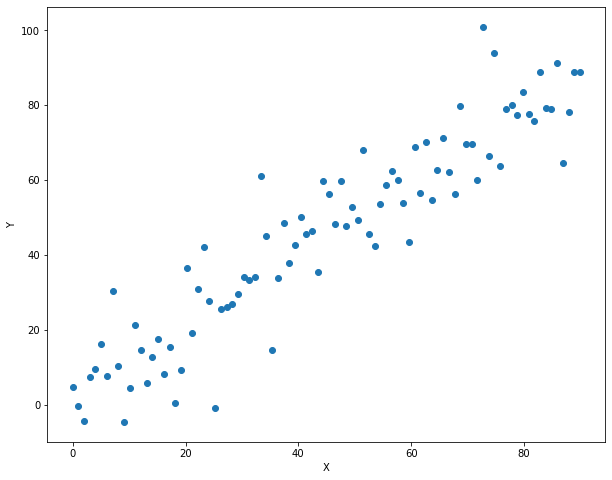

In [41]:
import matplotlib.pyplot as plt #导入画图的程序包

plt.figure(figsize=(10,8)) #设定绘制窗口大小为10*8 inch
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'o') 
plt.xlabel('X') #添加X轴的标注
plt.ylabel('Y') #添加Y周的标注
plt.show() #将图形画在下面

# 2. 構造模型，計算損失函數

In [42]:
a = Variable(torch.rand(1),requires_grad=True)
b = Variable(torch.rand(1),requires_grad=True)
print('Initial parameters:', [a, b])

Initial parameters: [tensor([0.8141], requires_grad=True), tensor([0.0368], requires_grad=True)]


In [43]:
learning_rate = 0.0001

In [44]:
for i in range(1000):
    predictions = a.expand_as(x_train) * x_train + b.expand_as(x_train)  #计算在当前a、b条件下的模型预测数值
    loss = torch.mean((predictions - y_train) ** 2) #通过与标签数据y比较，计算误差
    print('loss:', loss)
    loss.backward() #对损失函数进行梯度反传
    a.data.add_(- learning_rate * a.grad.data)  #利用上一步计算中得到的a的梯度信息更新a中的data数值
    b.data.add_(- learning_rate * b.grad.data)  #利用上一步计算中得到的b的梯度信息更新b中的data数值
    ### 增加了这部分代码，清空存储在变量a，b中的梯度信息，以免在backward的过程中会反复不停地累加
    a.grad.data.zero_() #清空a的梯度数值
    b.grad.data.zero_() #清空b的梯度数值

loss: tensor(193.7543, grad_fn=<MeanBackward0>)
loss: tensor(118.0230, grad_fn=<MeanBackward0>)
loss: tensor(102.1347, grad_fn=<MeanBackward0>)
loss: tensor(98.8013, grad_fn=<MeanBackward0>)
loss: tensor(98.1018, grad_fn=<MeanBackward0>)
loss: tensor(97.9549, grad_fn=<MeanBackward0>)
loss: tensor(97.9240, grad_fn=<MeanBackward0>)
loss: tensor(97.9174, grad_fn=<MeanBackward0>)
loss: tensor(97.9158, grad_fn=<MeanBackward0>)
loss: tensor(97.9154, grad_fn=<MeanBackward0>)
loss: tensor(97.9151, grad_fn=<MeanBackward0>)
loss: tensor(97.9149, grad_fn=<MeanBackward0>)
loss: tensor(97.9148, grad_fn=<MeanBackward0>)
loss: tensor(97.9146, grad_fn=<MeanBackward0>)
loss: tensor(97.9144, grad_fn=<MeanBackward0>)
loss: tensor(97.9142, grad_fn=<MeanBackward0>)
loss: tensor(97.9141, grad_fn=<MeanBackward0>)
loss: tensor(97.9139, grad_fn=<MeanBackward0>)
loss: tensor(97.9137, grad_fn=<MeanBackward0>)
loss: tensor(97.9135, grad_fn=<MeanBackward0>)
loss: tensor(97.9134, grad_fn=<MeanBackward0>)
loss: tens

loss: tensor(97.8570, grad_fn=<MeanBackward0>)
loss: tensor(97.8568, grad_fn=<MeanBackward0>)
loss: tensor(97.8566, grad_fn=<MeanBackward0>)
loss: tensor(97.8564, grad_fn=<MeanBackward0>)
loss: tensor(97.8563, grad_fn=<MeanBackward0>)
loss: tensor(97.8561, grad_fn=<MeanBackward0>)
loss: tensor(97.8559, grad_fn=<MeanBackward0>)
loss: tensor(97.8558, grad_fn=<MeanBackward0>)
loss: tensor(97.8556, grad_fn=<MeanBackward0>)
loss: tensor(97.8555, grad_fn=<MeanBackward0>)
loss: tensor(97.8553, grad_fn=<MeanBackward0>)
loss: tensor(97.8551, grad_fn=<MeanBackward0>)
loss: tensor(97.8549, grad_fn=<MeanBackward0>)
loss: tensor(97.8548, grad_fn=<MeanBackward0>)
loss: tensor(97.8546, grad_fn=<MeanBackward0>)
loss: tensor(97.8544, grad_fn=<MeanBackward0>)
loss: tensor(97.8543, grad_fn=<MeanBackward0>)
loss: tensor(97.8541, grad_fn=<MeanBackward0>)
loss: tensor(97.8539, grad_fn=<MeanBackward0>)
loss: tensor(97.8538, grad_fn=<MeanBackward0>)
loss: tensor(97.8536, grad_fn=<MeanBackward0>)
loss: tensor(

loss: tensor(97.7972, grad_fn=<MeanBackward0>)
loss: tensor(97.7971, grad_fn=<MeanBackward0>)
loss: tensor(97.7969, grad_fn=<MeanBackward0>)
loss: tensor(97.7967, grad_fn=<MeanBackward0>)
loss: tensor(97.7966, grad_fn=<MeanBackward0>)
loss: tensor(97.7964, grad_fn=<MeanBackward0>)
loss: tensor(97.7963, grad_fn=<MeanBackward0>)
loss: tensor(97.7961, grad_fn=<MeanBackward0>)
loss: tensor(97.7959, grad_fn=<MeanBackward0>)
loss: tensor(97.7958, grad_fn=<MeanBackward0>)
loss: tensor(97.7956, grad_fn=<MeanBackward0>)
loss: tensor(97.7954, grad_fn=<MeanBackward0>)
loss: tensor(97.7953, grad_fn=<MeanBackward0>)
loss: tensor(97.7951, grad_fn=<MeanBackward0>)
loss: tensor(97.7950, grad_fn=<MeanBackward0>)
loss: tensor(97.7948, grad_fn=<MeanBackward0>)
loss: tensor(97.7946, grad_fn=<MeanBackward0>)
loss: tensor(97.7945, grad_fn=<MeanBackward0>)
loss: tensor(97.7943, grad_fn=<MeanBackward0>)
loss: tensor(97.7942, grad_fn=<MeanBackward0>)
loss: tensor(97.7940, grad_fn=<MeanBackward0>)
loss: tensor(

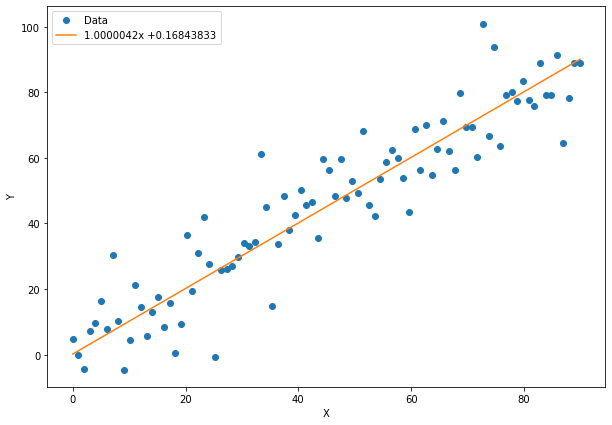

In [45]:
x_data = x_train.data.numpy() # 获得x包裹的数据
plt.figure(figsize = (10, 7)) #设定绘图窗口大小
xplot, = plt.plot(x_data, y_train.numpy(), 'o') # 绘制原始数据
yplot, = plt.plot(x_data, a.data.numpy() * x_data + b.data.numpy())  #绘制拟合数据
plt.xlabel('X') #更改坐标轴标注
plt.ylabel('Y') #更改坐标轴标注
str1 = str(a.data.numpy()[0]) + 'x +' + str(b.data.numpy()[0]) #图例信息
plt.legend([xplot, yplot],['Data', str1]) #绘制图例
plt.show()

# 預測

In [46]:
predictions = a.expand_as(x_test) * x_test + b.expand_as(x_test) #计算模型的预测结果
predictions #输出

tensor([ 91.0779,  92.0880,  93.0981,  94.1082,  95.1183,  96.1284,  97.1385,
         98.1487,  99.1588, 100.1689], grad_fn=<AddBackward0>)

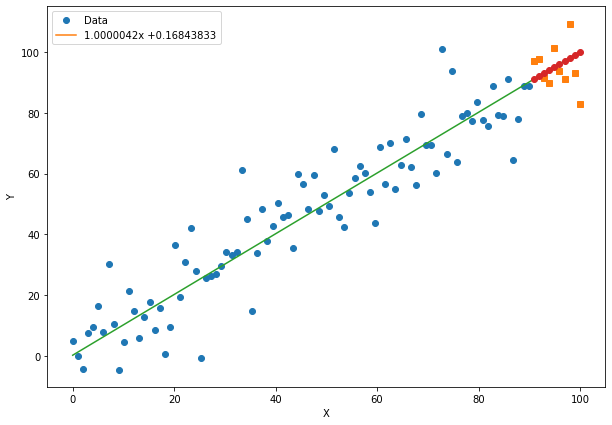

In [47]:
x_data = x_train.data.numpy() # 获得x包裹的数据
x_pred = x_test.data.numpy()
plt.figure(figsize = (10, 7)) #设定绘图窗口大小
plt.plot(x_data, y_train.data.numpy(), 'o') # 绘制训练数据
plt.plot(x_pred, y_test.data.numpy(), 's') # 绘制测试数据
x_data = np.r_[x_data, x_test.data.numpy()]
plt.plot(x_data, a.data.numpy() * x_data + b.data.numpy())  #绘制拟合数据
plt.plot(x_pred, a.data.numpy() * x_pred + b.data.numpy(), 'o') #绘制预测数据

plt.xlabel('X') #更改坐标轴标注
plt.ylabel('Y') #更改坐标轴标注
str1 = str(a.data.numpy()[0]) + 'x +' + str(b.data.numpy()[0]) #图例信息
plt.legend([xplot, yplot],['Data', str1]) #绘制图例
plt.show()

### 方塊點：測試集中實際的房價資料
### 直線上的小點：測試集上預測的房價資料

---

# 單車預測器